In [1]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt

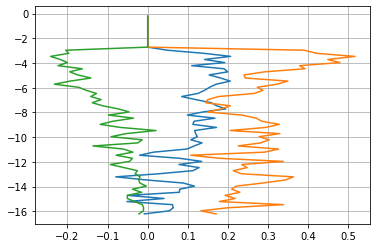

In [2]:
hf = h5py.File('ADCP_19_01_22_04.mat', 'r')
east_vel = hf['East_vel']
north_vel = hf['North_vel']
vertical_vel = hf['Vertical_vel']
z = hf['z_vec']

fig, ax = plt.subplots()
ax.plot(east_vel[1,:], z, label='East velocity [m/sec]')
ax.plot(north_vel[1,:], z, label='North velocity [m/sec]')
ax.plot(vertical_vel[1,:], z, label='Vertical velocity [m/sec]')
#plt.legend()

plt.grid(True)
plt.show()

In [3]:
east_vel[0,:].shape

(65,)

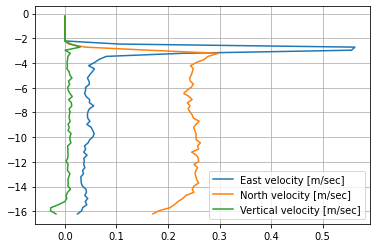

In [4]:
hf = h5py.File('ADCP_19_01_22_04.mat', 'r')
east_vel = np.array(hf['East_vel'])
north_vel = np.array(hf['North_vel'])
vertical_vel = np.array(hf['Vertical_vel'])
z = np.array(hf['z_vec'])
t = hf['time_vec']
hf.close()

time_start = 0*60 # sec
time_stop = 5*60 # sec
time_step = 2.5 #sec
start_i = int(time_start/time_step)
stop_i = int(time_stop/time_step)

east_vel_mean = np.mean(east_vel[start_i:stop_i], axis=0)
north_vel_mean = np.mean(north_vel[start_i:stop_i], axis=0)
vertical_vel_mean = np.mean(vertical_vel[start_i:stop_i], axis=0)

fig, ax = plt.subplots()
ax.plot(east_vel_mean, z, label='East velocity [m/sec]')
ax.plot(north_vel_mean, z, label='North velocity [m/sec]')
ax.plot(vertical_vel_mean, z, label='Vertical velocity [m/sec]')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
time_start

0

In [6]:
from math import cos, asin, sqrt, pi


In [57]:
def distance(lat1, lon1, lat2, lon2):
    r = 6371 # km
    p = pi / 180

    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 2 * r * asin(sqrt(a))

In [58]:
radar_lat = 32.07833
radar_long = 34.47233

In [59]:
adcp_lat = 32.08048
adcp_long = 34.46277

In [60]:
distance(radar_lat, radar_long, adcp_lat, adcp_long)

0.9319006597343568

In [11]:
import pandas as pd
import shapely
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

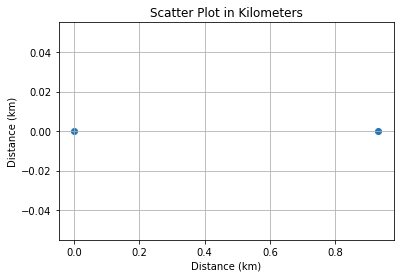

In [69]:
import numpy as np
import matplotlib.pyplot as plt

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    # Distance in kilometers
    distance = R * c
    
    return distance

# Convert coordinates to kilometers using the Haversine formula
distance_km = haversine(radar_lat, radar_long, adcp_lat, adcp_long)

# Plot the scatter plot with distance in kilometers
plt.scatter(x=np.array([0, distance_km]), y=np.array([0, 0]))
plt.grid(True)
plt.xlabel('Distance (km)')
plt.ylabel('Distance (km)')
plt.title('Scatter Plot in Kilometers')
plt.show()


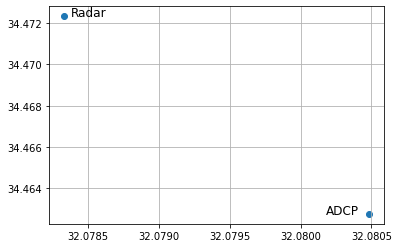

In [93]:
# Create scatter plot
plt.scatter(x=np.array([radar_lat, adcp_lat]), y=np.array([radar_long, adcp_long]))

# Label each point with an offset
plt.text(radar_lat +0.0003 , radar_long , 'Radar', fontsize=12, ha='right')
plt.text(adcp_lat - 0.00007, adcp_long , 'ADCP', fontsize=12, ha='right')

# Set grid
plt.grid(True)

# Show the plot
plt.show()

In [18]:
# importing the libraries
%matplotlib inline
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [21]:
points = 'C:\\Users\josep\Desktop\Long_Lats.csv'
data = pd.read_csv(points)

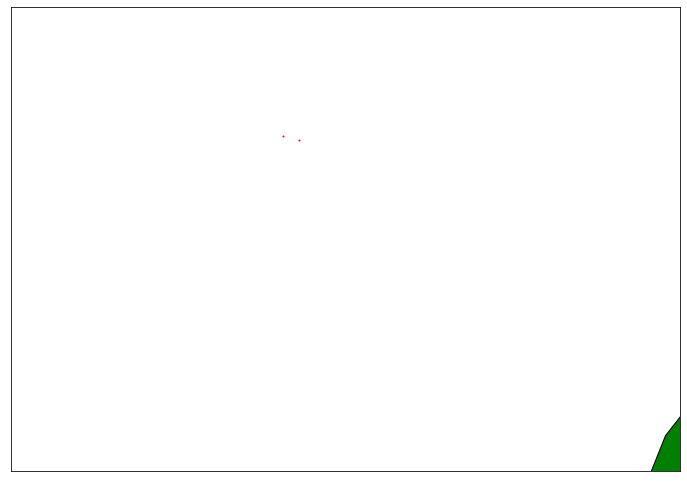

In [55]:
# setting the size of the map
fig = plt.figure(figsize=(12,9))

# creating the map - setting latitude and longitude
m = Basemap(projection = 'mill', llcrnrlat = 31.9, urcrnrlat = 32.15, llcrnrlon = 34.3, urcrnrlon = 34.7, resolution = 'h')

# drawing the coastline
m.drawcoastlines()
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.fillcontinents(color='green', lake_color='blue')
#m.bluemarble()

# creating variable for latitude and longitude to list
lat = data['Latitude'].tolist()
lon = data['Longitude'].tolist()

# plotting the map
m.scatter(lon, lat, latlon = True, s = 1, c = 'red', marker = 'o', alpha = 1)

plt.show()